# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [164]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/penguins_size.csv')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
206,Chinstrap,Dream,42.5,17.3,187.0,3350.0,FEMALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE
177,Chinstrap,Dream,52.0,19.0,197.0,4150.0,MALE
322,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [165]:
#2
df.info()
# info() digunakan untuk menunjukkan berapa jumlah data pada dataset serta data typenya dan juga jumlah non-null pada tiap kolom
# conclude
# Ada beberapa data yang null yaitu pada kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_gg, dan sex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [166]:
#3
df.describe()
# describe digunakan untuk menunjukkan percentile, min, max dan jumlah data
# conclude
# tabel ini memberikan ikhtisar statistik tentang culmen length, culmen depth, flipper values, dan body mass penguin dalam dataset,
# yang menawarkan wawasan tentang nilai-nilai tipikal, variabilitas, dan distribusinya

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [167]:
#4
print(df['species'].value_counts(dropna=False))
print(df['island'].value_counts(dropna=False))
print(df['sex'].value_counts(dropna=False))

# value_counts digunakan untuk menampilkan jumlah data untuk setiap data unik di kolom yang diinginkan
# dropna=False berarti data yang ditampilkan juga bisa NaN

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [168]:
#5
df['sex'] = df['sex'].replace('.', df['sex'].mode()[0])
df.dropna(inplace=True)
df.isnull().sum()

# replace digunakan untuk mengubah suatu data menjadi data lainnya
# dropna(inplace=True) digunakan untuk menghapus data yang memiliki null value
# isnull().sum() mengecek dan menghitung jumlah nilai yang hilang (missing values) atau null pada setiap kolom

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

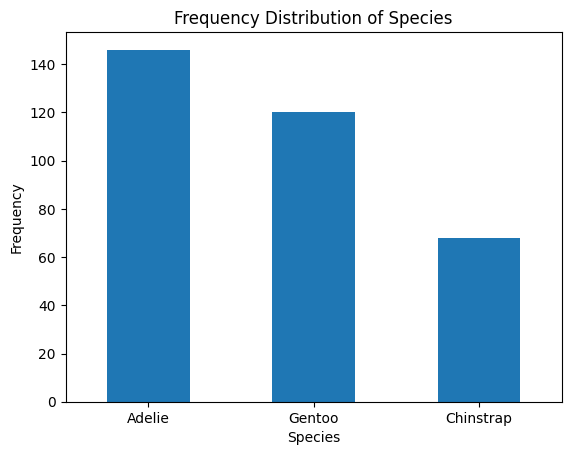

In [169]:
#6
df['species'].value_counts().plot(kind='bar')
plt.title("Frequency Distribution of Species")
plt.xlabel('Species')
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

 # Grafik di atas menunjukkan distribusi frekuensi dari tiga spesies, yaitu Adelie, Gentoo, dan Chinstrap.
 # Dari grafik terlihat bahwa spesies Adelie memiliki jumlah individu paling banyak, diikuti oleh Gentoo, dan Chinstrap memiliki jumlah individu paling sedikit.

7. Check unique value of our target variable

In [170]:
#7
print(df['species'].unique())
#unique() digunakan untuk mengetahui jenis-jenis spesies penguin yang ada dalam dataset

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [171]:
#8
island_map = {'Torgersen': 2, 'Dream': 1, 'Biscoe': 0}
sex_map = {'MALE': 2, 'FEMALE': 1}
df['island'] = df['island'].map(island_map)
df['sex'] = df['sex'].map(sex_map)
df.head()

# pada df['island'] = df['island'].map(island_map), saya mengubah tiap data pada island menjadi angka yang sesuai dengan isi dari island_map
# pada df['sex'] = df['sex'].map(sex_map), saya mengubah tiap data pada sex menjadi angka yang sesuai dengan isi dari sex_map

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [172]:
#9
species_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df['species'] = df['species'].map(species_map)
df.head()
# pada df['species'] = df['species'].map(species_map), saya mengubah tiap data pada species menjadi angka yang sesuai dengan isi dari species_map

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

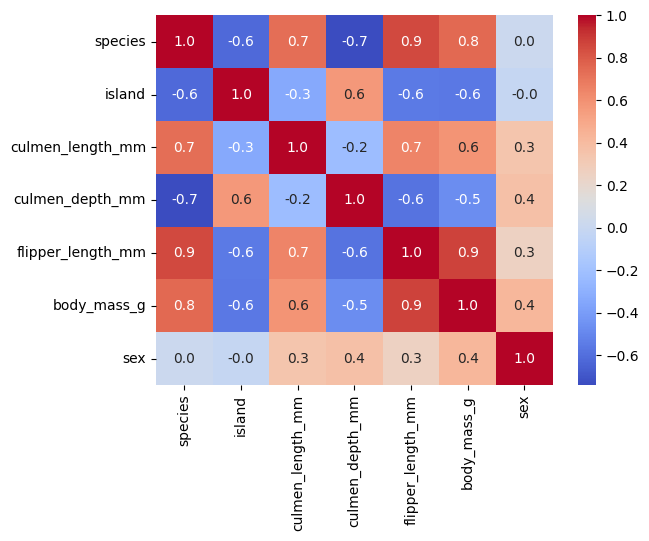

In [173]:
#10
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='0.1f')
plt.show()

# Code ini menghasilkan visualisasi heatmap yang menunjukkan korelasi antar variabel dalam dataframe df.
# Heatmap tersebut menggunakan skema warna coolwarm

# conclusion
# Grafik ini adalah heatmap yang menunjukkan matriks korelasi antara berbagai variabel.
# Warna yang semakin merah menunjukkan korelasi positif yang kuat, sedangkan warna biru menunjukkan korelasi negatif yang kuat, dengan warna biru agak pudar menunjukkan tidak ada korelasi.
# Grafik ini membantu memahami hubungan antara berbagai variabel dalam dataset, yang berguna untuk analisis lebih lanjut atau pembuatan model prediktif.

## Machine Learning

1. Splitting X and y

In [174]:
#1
X = df.drop('species', axis=1)
y = df['species']
# untuk X saya melakukan drop pada kolom species, karena x akan menampung data dari kolom-kolom selain species
# untuk y saya menggunakan data dari kolom species

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [175]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Code ini membagi data menjadi data latih dan data uji dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# Seed random_state=42 digunakan untuk memastikan konsistensi pembagian data. Hasil pembagian data disimpan dalam variabel X_train, X_test, y_train, dan y_test.

In [176]:
#3
X_train.shape,X_test.shape
# Code ini berguna untuk memeriksa dimensi data latih dan data uji, memastikan bahwa pembagian data sudah sesuai dan data memiliki jumlah fitur yang sama.

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [177]:
#Criterion Entropy
#a
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
dt_entropy.fit(X_train, y_train)

# Code tersebut membuat dan melatih model Decision Tree dengan kriteria entropy, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [178]:
#b
y_pred_entropy = dt_entropy.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_entropy) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy

In [179]:
#c
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_entropy)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_entropy

Model accuracy score with criterion entropy: 0.9701492537313433


In [180]:
#d
print("Training set score (Entropy): ", dt_entropy.score(X_train, y_train))
print("Test set score (Entropy): ", dt_entropy.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_entropy

Training set score (Entropy):  0.9625468164794008
Test set score (Entropy):  0.9701492537313433


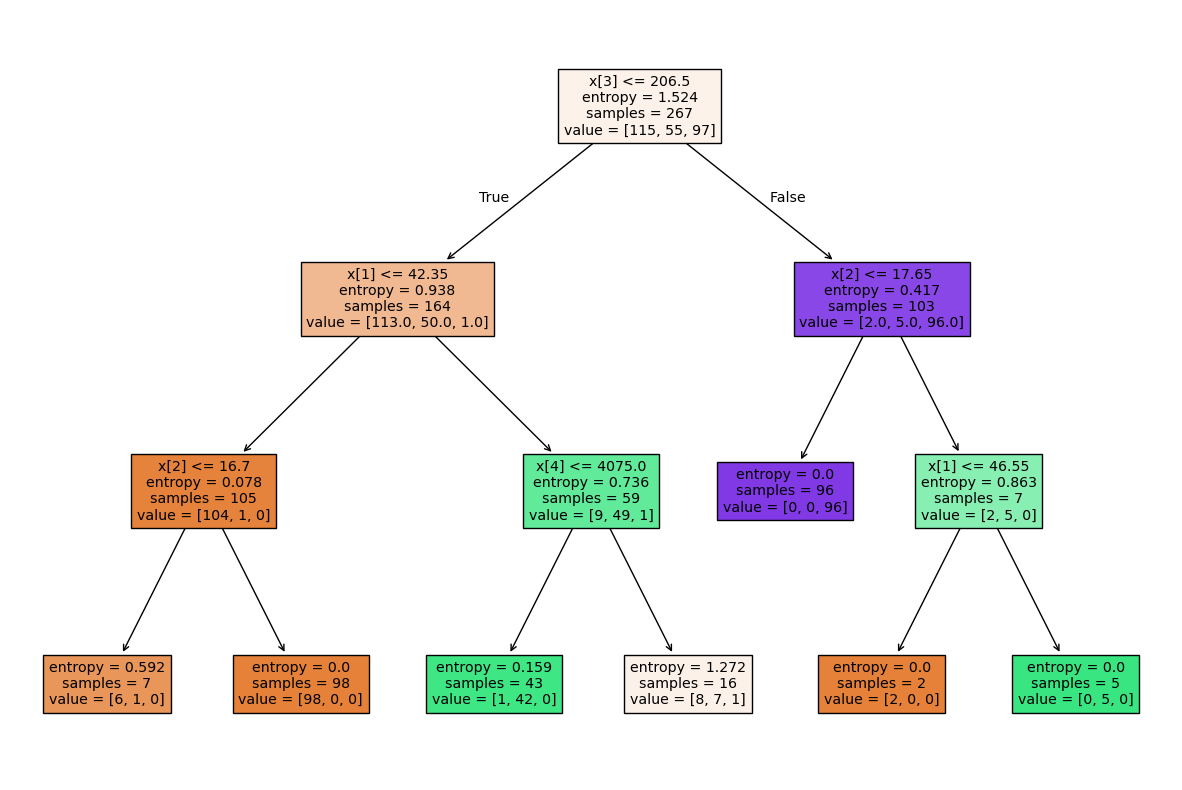

In [181]:
#e
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_entropy dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

2. Criterion Gini index

In [182]:
#a
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_gini.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria Gini Index, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train

DecisionTreeClassifier(max_depth=3, random_state=0)

In [183]:
#b
y_pred_gini = dt_gini.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_gini) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_gini

In [184]:
#c
print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_gini

Model accuracy score with criterion gini index: 0.9850746268656716


In [185]:
#d
print("Training set score (Gini Index): ", dt_gini.score(X_train, y_train))
print("Test set score (Gini Index): ", dt_gini.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_gini

Training set score (Gini Index):  0.9737827715355806
Test set score (Gini Index):  0.9850746268656716


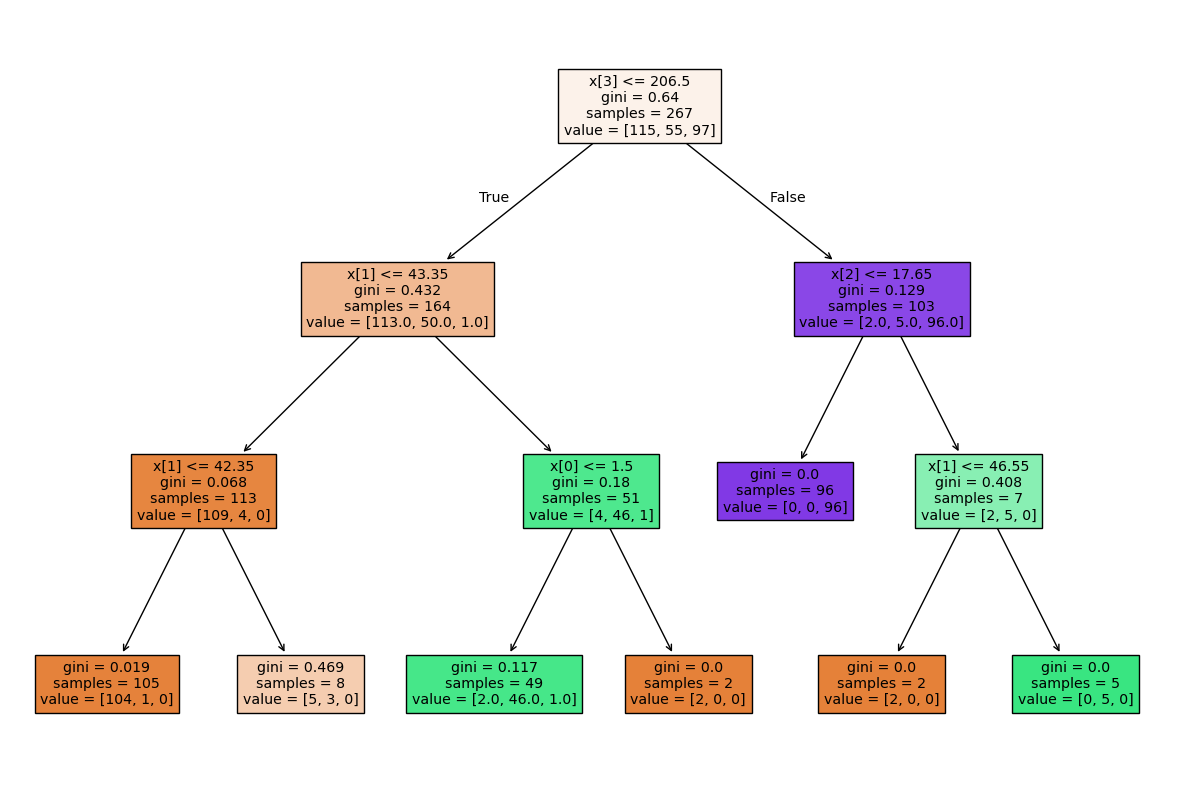

In [186]:
#e
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_gini dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [187]:
#f
print("Confusion Matrix Entropy\n",confusion_matrix(y_test, y_pred_entropy))
print("Confusion Matrix Gini Index\n",confusion_matrix(y_test, y_pred_gini))

# Code ini akan menampilkan dua confusion matrix, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index


Confusion Matrix Entropy
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix Gini Index
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [188]:
#g
print("Classification Report Entropy\n",classification_report(y_test, y_pred_entropy))
print("Classification Report Gini Index\n",classification_report(y_test, y_pred_gini))

# Code ini akan menampilkan dua Classification Report, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Classification Report Entropy
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [189]:
#h

# Dari hasil yang diberikan pada model dengan kriteria gini index, skor akurasi pada training set adalah 0.9738 sementara skor akurasi pada test set adalah 0.9851.
# Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting, begitu pula dengan kriteria entropy.
# Kedua model menunjukkan performa yang sangat baik, dengan model gini index sedikit lebih unggul dibandingkan model entropy

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [190]:
#a
nb = GaussianNB()
# Code di atas digunakan untuk membuat model Naive Bayes Gaussian.
nb.fit(X_train, y_train)
# Code di atas digunakan untuk melatih model menggunakan data pelatihan X_train dan y_train.

GaussianNB()

In [191]:
#b
y_pred_nb = nb.predict(X_test)

In [192]:
#c
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_nb))

# Code ini akan menampilkan confusion matrix untuk model Naves Bayes
#d
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))

# Code ini akan menampilkan accuracy score untuk model Naves Bayes

Confusion Matrix
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score:  1.0


In [193]:
#e
print("Classification Report\n",classification_report(y_test, y_pred_nb))
# Code ini akan menampilkan Classification report untuk model Naves Bayes

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [194]:
#f
# Hasil Confusion Matrix menunjukkan bahwa model ini berhasil mengklasifikasikan semua data dengan benar, tidak ada kesalahan prediksi pada semua kelas (0, 1, dan 2).
# Skor akurasi yang diperoleh adalah 1.0, yang berarti model memiliki akurasi sempurna dalam memprediksi kelas pada test set
# Laporan klasifikasi menunjukkan bahwa precision, recall, dan f1-score untuk semua kelas adalah 1.00.
# Ini menunjukkan bahwa model ini tidak hanya memiliki akurasi yang sempurna, tetapi juga performa yang konsisten dan sangat baik pada semua metrik evaluasi

Good Luck :)